In [1]:
# To import libraries for Yolo-90000.

from darkflow.net.build import TFNet
import cv2
import time
import os
import matplotlib.pyplot as plt
import numpy as np


/Users/anirudhrv/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/anirudhrv/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/anirudhrv/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/anirudhrv/anaconda3/lib/python3.6/site-packages/tensorflow/pyth

In [2]:
# To import PyTesseract 
import pytesseract


In [3]:
# To set the directory for easy access.

os.chdir("Desktop/FinalYearProject/Yolo_With_Textboxplusplus")

In [4]:
# To import libraries for TextBox++
import tensorflow as tf
from timeit import default_timer as timer

from tbpp_model import TBPP512, TBPP512_dense
from tbpp_utils import PriorUtil

from ssd_data import preprocess
from sl_utils import rbox3_to_polygon, polygon_to_rbox, rbox_to_polygon


Using TensorFlow backend.


In [5]:
# To load the model and the weights.

yolo9000 = {"model" : "cfg/yolo9000.cfg", "load" : "yolo9000.weights", "threshold": 0.01}
tfnet = TFNet(yolo9000)


Parsing ./cfg/yolo9000.cfg
Parsing cfg/yolo9000.cfg
Loading yolo9000.weights ...
Successfully identified 195230020 bytes
Finished in 1.368556022644043s
Model has name yolo9000, loading yolo9000 labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 128)
 Load  |

In [6]:
# Model for TextBox++
print("Initialising Model...")
start_time = time.time()

if __name__ == '__main__':
    Model = TBPP512_dense
    input_shape = (512,512,3)
    weights_path = 'weights.022.h5'
    confidence_threshold = 0.35
    confidence_threshold = 0.25

    sl_graph = tf.Graph()
    with sl_graph.as_default():
        sl_session = tf.Session()
        with sl_session.as_default():
            sl_model = Model(input_shape)
            prior_util = PriorUtil(sl_model)
            sl_model.load_weights(weights_path, by_name=True)

    input_width = 256
    input_height = 32
    weights_path = 'weights.022.h5'

print("DONE!")
elapsed_time = time.time() - start_time
print("Performace measure : "+str(elapsed_time))            

Initialising Model...
DONE!
Performace measure : 24.34681987762451


In [ ]:
# TESTING ONLY ONE PICTURE.

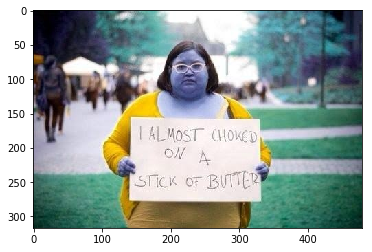

(11, 73)
(44, 191)
person
results/crp_person_1peopletext1.jpeg


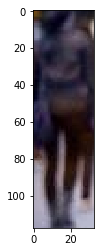

1
(113, 63)
(361, 300)
person
results/crp_person_2peopletext1.jpeg


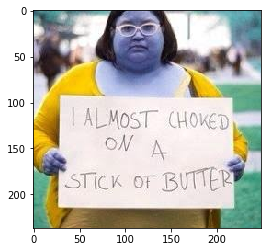

2
Performace measure : 14.146767139434814


In [7]:
# To run single photo and save each box.

start_time = time.time()

img = "data/peopletext1.jpeg"
imgname = "peopletext1.jpeg"

imgcv = cv2.imread(img)
plt.imshow(imgcv)
plt.show()

result = tfnet.return_predict(imgcv)
count = 1

cv2.imwrite("results/Orginial_"+str(imgname), imgcv)

for res in result:
    if res["label"] == "whole":
        continue
    else:
        color = int(255 * res["confidence"])
        top = (res["topleft"]["x"], res["topleft"]["y"])
        bottom = (res["bottomright"]["x"], res["bottomright"]["y"])
        # for each person
        print(top)
        print(bottom)
        crop_img = imgcv[res["topleft"]["y"]:res["bottomright"]["y"],res["topleft"]["x"]:res["bottomright"]["x"]]
        
        print(res["label"])
        if len(crop_img) != 0:
            #cv2.imwrite("results/crop_"+res["label"]+"_"+str(count)+"_"+str(imgname), crop_img)
            print("results/crp_"+res["label"]+"_"+str(count)+str(imgname))
            plt.imshow(crop_img)
            plt.show()

        
        
        cv2.rectangle(imgcv, top, bottom, (255,0,0) , 2)
        #cv2.putText(imgcv, res["label"], top, cv2.FONT_HERSHEY_DUPLEX, 1.0, (0,0,255))
        print(count)
    count = count + 1

    
cv2.imwrite("data/Result/Final_"+str(imgname), imgcv)
elapsed_time = time.time() - start_time
print("Performace measure : "+str(elapsed_time))

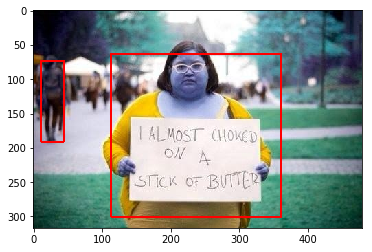

False

In [8]:
#print (result) result of all boxes.

plt.imshow(imgcv)
plt.show()

cv2.imwrite("results/Result.jpg", imgcv)

In [ ]:
#METHOD 1 : FAILED. DO NOT USE.
#METHOD 2 : WORKS.USE.

In [ ]:
# To make frames.

# Command to make videos to frames : ffmpeg -i TestVid.mp4 -vf fps=30 Frames/out%d.png

# Command to make frames to videos : ffmpeg -start_number 1 -i Frames/out%d.png -c:v libx264 -vf fps=30 -pix_fmt yuv420p out.mp4

# Code to run Commands in python : os.system("ffmpeg -i TestVid.mp4 -vf fps=30 Frames/out%d.png")

In [ ]:
#METHOD 1 : FAILED METHOD. USE AS BACKUP FOR TESTING.

In [ ]:
# TEST MODULE TO : CONVERT VIDEO TO FRAME -> RUN THE FRAMES ON YOLO -> CONVERT THE FRAMES BACK TO VIDEO.

In [ ]:
# Video to Frames.

directory_input = "data/"
video_name = "TestVid.mp4"
directory_output = "data/Frames/"
output_name = "output_frames_"

video_to_frames = "ffmpeg -i "+directory_input+video_name+" -vf fps=30 "+directory_output+output_name+"%d.png"
print(video_to_frames)
os.system(video_to_frames)


In [ ]:
# To run frames stored.

count = 1
prefix = "data/Frames/"
for i in os.listdir('data/Frames'):    
    if i == '.DS_Store':
        pass
    else:
        start_time = time.time()
        img = prefix+i
        print("Input : ")
        print(img)
        imgcv = cv2.imread(img)
        result = tfnet.return_predict(imgcv)
        for res in result:
            if res["label"] == "whole":
                continue
            else:
                color = int(255 * res["confidence"])
                top = (res["topleft"]["x"], res["topleft"]["y"])
                bottom = (res["bottomright"]["x"], res["bottomright"]["y"])
                cv2.rectangle(imgcv, top, bottom, (255,0,0) , 2)
                #cv2.putText(imgcv, res["label"], top, cv2.FONT_HERSHEY_DUPLEX, 1.0, (0,0,255))

        print("Output : ")
        print("data/Result_Frames/"+i)
        cv2.imwrite("data/Result_Frames/"+i, imgcv)
        count = count + 1
        elapsed_time = time.time() - start_time
        print("Performace measure : "+str(elapsed_time))

In [ ]:
# Frames to Video.

directory_input = "data/Result_Frames/"
frame_name = "output_frame_test"
directory_output = "data/Result_Videos/"
output_video = "output_video_quick1"

frames_to_video = "ffmpeg -start_number 1 -i "+directory_input+frame_name+"%d.png -c:v libx264 -vf fps=30 -pix_fmt yuv420p "+directory_output+output_video+".mp4"
print(frames_to_video)
os.system(frames_to_video)

In [ ]:
#METHOD 2: ACCEPTED. USE FOR FINAL.

In [ ]:
# Video capture using Video(OpenCV),WebCam,URL (remote video capture)

In [9]:
# variables 
vid_file = "data/pleasework.mp4"
vid_name = "pleasework"
cap = cv2.VideoCapture(vid_file)
frame_array = []
framecount = 0

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

out = cv2.VideoWriter('outpy.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 30, (frame_width,frame_height))



In [10]:
# Video Capture using OpenCV VideoCapture
start_time = time.time()

# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    framecount = framecount + 1
    ret, frame = cap.read()
    if frame is not None:
        if framecount % 2 == 0:
            result = tfnet.return_predict(frame)
            for res in result:
                if res["label"] == "whole" or res["label"] == "instrumentality" or res["label"] == "chordate":
                    continue
                else:
                    color = int(255 * res["confidence"])
                    top = (res["topleft"]["x"], res["topleft"]["y"])
                    bottom = (res["bottomright"]["x"], res["bottomright"]["y"])
                    cv2.rectangle(frame, top, bottom, (255,0,0) , 2)
                    #cv2.putText(imgcv, res["label"], top, cv2.FONT_HERSHEY_DUPLEX, 1.0, (0,0,255))
            
        else:
            # process by skipping frames
            pass
                
        
        frame_array.append(frame)
        out.write(frame)

        c = cv2.waitKey(1)
        if c == 27:
            break
    else:
        break


elapsed_time = time.time() - start_time
print("Performace measure : "+str(elapsed_time))

# When everything done, release the video capture and video write objects
cap.release()
out.release()
 
# Closes all the frames


Performace measure : 34.85063695907593


In [ ]:
# Video Capture on Webcam 
cap = cv2.VideoCapture(0)

# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    framecount = framecount + 1
    ret, frame = cap.read()
    if frame is not None:
        if framecount % 1 == 0:
            result = tfnet.return_predict(frame)
            for res in result:
                if res["label"] == "whole" or res["label"] == "instrumentality" or res["label"] == "chordate":
                    continue
                else:
                    print(res["label"])
                    color = int(255 * res["confidence"])
                    top = (res["topleft"]["x"], res["topleft"]["y"])
                    bottom = (res["bottomright"]["x"], res["bottomright"]["y"])
                    cv2.rectangle(frame, top, bottom, (255,0,0) , 2)
                    #cv2.putText(imgcv, res["label"], top, cv2.FONT_HERSHEY_DUPLEX, 1.0, (0,0,255))
            
        else:
            # process by skipping frames
            pass
                
        cv2.imshow('OUTPUT', frame)
        frame_array.append(frame)
        c = cv2.waitKey(1)
        if c == 27:
            break
    else:
        break


cap.release()
cv2.destroyAllWindows()

In [ ]:
# Video Capture on URL (Not Working.)

url = "https://www.earthcam.com/usa/newyork/timessquare/?cam=tstwo_hd"
vid_file = "data/TestVid.mp4"

# Open a sample video available in sample-videos
vcap = cv2.VideoCapture(vid_file)
#if not vcap.isOpened():
#    print "File Cannot be Opened"

while(True):
    # Capture frame-by-frame
    ret, frame = vcap.read()
    #print cap.isOpened(), ret
    if frame is not None:
        # Display the resulting frame
        cv2.imshow('frame',frame)
        # Press q to close the video windows before it ends if you want
        if cv2.waitKey(22) & 0xFF == ord('q'):
            break
    else:
        print ("Frame is None")
        break

# When everything done, release the capture
vcap.release()
cv2.destroyAllWindows()
print ("Video stop")

In [11]:
#Run TextBox++ on just one image.

print("Running on Image...")
start_time = time.time()
# Final TextBox++ Code : (Works on just image)
input_size = input_shape[:2]

# model to predict

img = cv2.imread('data/crowd.png')

img_h = img.shape[0]
img_w = img.shape[1]


img1 = np.copy(img)
img2 = np.zeros_like(img)

# model to predict
x = np.array([preprocess(img, input_size)])




#x = np.array([preprocess(img, input_size)])
with sl_graph.as_default():
    with sl_session.as_default():
        y = sl_model.predict(x)

result = prior_util.decode(y[0], confidence_threshold)

if len(result) > 0:
    bboxs = result[:,0:4]
    quads = result[:,4:12]
    rboxes = result[:,12:17]

    boxes = np.asarray([rbox3_to_polygon(r) for r in rboxes])

    xy = boxes
    xy = xy * [img_w, img_h]
    xy = np.round(xy)
    xy = xy.astype(np.int32)

    cv2.polylines(img1, tuple(xy), True, (0,0,255))

    rboxes = np.array([polygon_to_rbox(b) for b in np.reshape(boxes, (-1,4,2))])
    bh = rboxes[:,3]
    rboxes[:,2] += bh * 0.1
    rboxes[:,3] += bh * 0.2
    boxes = np.array([rbox_to_polygon(f) for f in rboxes])

    boxes = np.flip(boxes, axis=1) # TODO: fix order of points, why?
    boxes = np.reshape(boxes, (-1, 8))

    boxes_mask_a = np.array([b[2] > b[3] for b in rboxes]) # width > height, in square world
    boxes_mask_b = np.array([not (np.any(b < 0) or np.any(b > 512)) for b in boxes]) # box inside image
    boxes_mask = np.logical_and(boxes_mask_a, boxes_mask_b)

    boxes = boxes[boxes_mask]
    rboxes = rboxes[boxes_mask]
    xy = xy[boxes_mask]

    if len(boxes) == 0:
        boxes = np.empty((0,8))

# draw fps
cv2.rectangle(img1, (0,0), (50, 17), (255,255,255), -1)
cv2.imwrite('data/Result/crowd.jpg', img1)
print("DONE!")
elapsed_time = time.time() - start_time
print("Performace measure : "+str(elapsed_time))

Running on Image...
DONE!
Performace measure : 14.824387073516846


In [12]:
# To read from PyTesseract
transcript = pytesseract.image_to_string(Image.open('Desktop/SamsungResearch/Algorithm/Yolo/IndiResult/sample10_1.jpg'), lang='eng').upper()
print(transcript)

NameError: name 'Image' is not defined

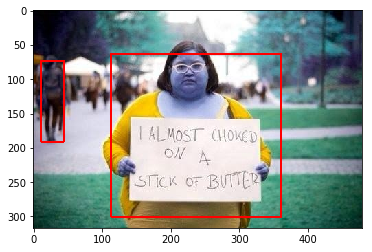

x[i] : [[1002  280]
 [1097  280]
 [1097  302]
 [1002  302]]
280
302
1002
1097


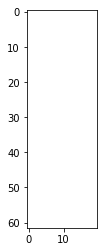


x[i] : [[235 454]
 [301 471]
 [280 504]
 [214 487]]
454
504
235
280


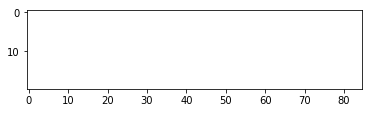

In [13]:
# Running PyTesseract on Images run on TextBox++
top = 10
bottom = 10
left = 10
right = 10
#crop_img = imgcv[res["topleft"]["y"]:res["bottomright"]["y"],res["topleft"]["x"]:res["bottomright"]["x"]]
"""
    xy arranged in : (TextBox++ result)
    
    
    xy[0]----------------xy[1]
      |                    |
      |                    |
      |                    |
      |                    |
    xy[3]----------------xy[2]
    
    
"""

plt.imshow(imgcv)
plt.show()
for i in xy:
    print("x[i] : "+str(i))
    print(i[0][1])
    print(i[2][1])
    print(i[0][0])
    print(i[2][0])
    
    
    crop_img = imgcv[i[0][1]-10:i[2][1]+10,i[0][0]-10:i[2][0]+10]
    
    
    
    color = [255,255,255]
    crop_img = cv2.copyMakeBorder(crop_img, top, bottom, left, right, cv2.BORDER_CONSTANT,value=color)
    plt.imshow(crop_img)
    plt.show()
    
    
    transcript = pytesseract.image_to_string(crop_img, lang='eng').upper()
    print(transcript)



Running on Image...


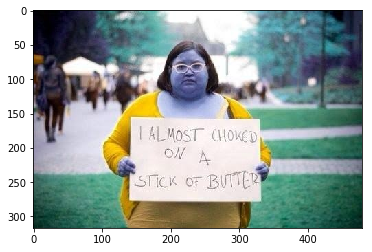

YOLO PERFORMANCE : 4.153748035430908
TextBox++ PERFORMANCE : 10.709887027740479



person
results/crp_person_1peopletext1
1
person
results/crp_person_2peopletext1
2


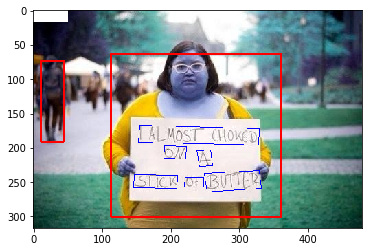

DONE!


In [14]:
# RUNNING YOLO-9000 and then TextBox++ ON IMAGES
"""
Problems with threads in python, make it slower to run using threads (*exception is IO operations).
To improve performace, parallel execution has to be done on the GPU level and not the execution code level.
"""
# To run single photo and save each box.
print("Running on Image...")


img = "data/peopletext1.jpeg"
imgname = "peopletext1"
imgcv = cv2.imread(img)
plt.imshow(imgcv)
plt.show()

start_time = time.time()
# YOLO-9000 : START
resultyolo = tfnet.return_predict(imgcv)
count = 1
elapsed_time = time.time() - start_time
print("YOLO PERFORMANCE : "+str(elapsed_time))
# YOLO-9000 : END



# TextBox++ : START 
input_size = input_shape[:2]

# model to predict
img = imgcv
img_h = img.shape[0]
img_w = img.shape[1]
img1 = np.copy(img)
img2 = np.zeros_like(img)
x = np.array([preprocess(img, input_size)])

start_time = time.time()
#x = np.array([preprocess(img, input_size)])
with sl_graph.as_default():
    with sl_session.as_default():
        y = sl_model.predict(x)

elapsed_time = time.time() - start_time
print("TextBox++ PERFORMANCE : "+str(elapsed_time))
# TextBox++ : END



# --------------------------------------------------------------------------------------------------------

# Running PyTesseract on Images run on TextBox++
top = 10
bottom = 10
left = 10
right = 10
total_transcript = ""
#crop_img = imgcv[res["topleft"]["y"]:res["bottomright"]["y"],res["topleft"]["x"]:res["bottomright"]["x"]]
"""
    xy arranged in : (TextBox++ result)
    
    
    xy[0]----------------xy[1]
      |                    |
      |                    |
      |                    |
      |                    |
    xy[3]----------------xy[2]
    
    
"""
for i in xy:
    #print("x[i] : "+str(i))
    #print(i[0][1])
    #print(i[2][1])
    #print(i[0][0])
    #print(i[2][0])
    
    crop_img = imgcv[i[0][1]-10:i[2][1]+10,i[0][0]-10:i[2][0]+10]
    
    
    
    color = [255,255,255]
    crop_img = cv2.copyMakeBorder(crop_img, top, bottom, left, right, cv2.BORDER_CONSTANT,value=color)
    #plt.imshow(crop_img)
    #plt.show()
    
    
    transcript = pytesseract.image_to_string(crop_img, lang='eng').upper()
    total_transcript += transcript + "\n"
    
    
print(total_transcript)
with open('data/Result/'+imgname+'.txt', 'w') as the_file:
    the_file.write(total_transcript)
# --------------------------------------------------------------------------------------------------------

# YOLO-9000 : Drawing Boxes
for res in resultyolo:
    if res["label"] == "whole":
        continue
    else:
        color = int(255 * res["confidence"])
        top = (res["topleft"]["x"], res["topleft"]["y"])
        bottom = (res["bottomright"]["x"], res["bottomright"]["y"])
        # for each person
        crop_img = imgcv[res["topleft"]["y"]:res["bottomright"]["y"],res["topleft"]["x"]:res["bottomright"]["x"]]
        
        print(res["label"])
        if len(crop_img) != 0:
            #cv2.imwrite("results/crop_"+res["label"]+"_"+str(count)+"_"+str(imgname), crop_img)
            print("results/crp_"+res["label"]+"_"+str(count)+str(imgname))
            #plt.imshow(crop_img)
            #plt.show()

        cv2.rectangle(img1, top, bottom, (255,0,0) , 2)
        #cv2.putText(imgcv, res["label"], top, cv2.FONT_HERSHEY_DUPLEX, 1.0, (0,0,255))
        print(count)
    count = count + 1

    
# TextBox++ : Decoding and Drawing boxes
resultbox = prior_util.decode(y[0], confidence_threshold)
if len(resultbox) > 0:
    bboxs = resultbox[:,0:4]
    quads = resultbox[:,4:12]
    rboxes = resultbox[:,12:17]

    boxes = np.asarray([rbox3_to_polygon(r) for r in rboxes])

    xy = boxes
    xy = xy * [img_w, img_h]
    xy = np.round(xy)
    xy = xy.astype(np.int32)

    
    
    cv2.polylines(img1, tuple(xy), True, (0,0,255))
        
    
    rboxes = np.array([polygon_to_rbox(b) for b in np.reshape(boxes, (-1,4,2))])
    bh = rboxes[:,3]
    rboxes[:,2] += bh * 0.1
    rboxes[:,3] += bh * 0.2
    boxes = np.array([rbox_to_polygon(f) for f in rboxes])

    boxes = np.flip(boxes, axis=1) # TODO: fix order of points, why?
    boxes = np.reshape(boxes, (-1, 8))

    boxes_mask_a = np.array([b[2] > b[3] for b in rboxes]) # width > height, in square world
    boxes_mask_b = np.array([not (np.any(b < 0) or np.any(b > 512)) for b in boxes]) # box inside image
    boxes_mask = np.logical_and(boxes_mask_a, boxes_mask_b)

    boxes = boxes[boxes_mask]
    rboxes = rboxes[boxes_mask]
    xy = xy[boxes_mask]

    if len(boxes) == 0:
        boxes = np.empty((0,8))
    

cv2.rectangle(img1, (0,0), (50, 17), (255,255,255), -1)
plt.imshow(img1)
plt.show()
cv2.imwrite('data/Result/final_'+imgname+'.png', img1)
print("DONE!")

In [15]:
# variables 
# RUNNING YOLO-9000 and then TextBox++ ON VIDEO

vid_file = "data/pleasework.mp4"
vid_name = "pleasework"
cap = cv2.VideoCapture(vid_file)
frame_array = []
framecount = 0

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

out = cv2.VideoWriter('out_video.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 30, (frame_width,frame_height))


# Video Capture using OpenCV VideoCapture
start_time = time.time()

# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    framecount = framecount + 1
    ret, frame = cap.read()
    if frame is not None:
        if framecount % 2 == 0:
            # yolo
            resultyolo = tfnet.return_predict(frame)
            
            # textbox++
            input_size = input_shape[:2]
            img = frame
            img_h = img.shape[0]
            img_w = img.shape[1]
            img1 = np.copy(img)
            img2 = np.zeros_like(img)
            x = np.array([preprocess(img, input_size)])

            #x = np.array([preprocess(img, input_size)])
            with sl_graph.as_default():
                with sl_session.as_default():
                    y = sl_model.predict(x)
            # YOLO-9000 : Drawing Boxes
            
            for res in resultyolo:
                if res["label"] == "whole":
                    continue
                else:
                    color = int(255 * res["confidence"])
                    top = (res["topleft"]["x"], res["topleft"]["y"])
                    bottom = (res["bottomright"]["x"], res["bottomright"]["y"])
                    # for each person
                    crop_img = imgcv[res["topleft"]["y"]:res["bottomright"]["y"],res["topleft"]["x"]:res["bottomright"]["x"]]

                    if len(crop_img) != 0:
                        #cv2.imwrite("results/crop_"+res["label"]+"_"+str(count)+"_"+str(imgname), crop_img)
                        #print("results/crp_"+res["label"]+"_"+str(count)+str(imgname))
                        #plt.imshow(crop_img)
                        #plt.show()
                        pass
                    
                    cv2.rectangle(img1, top, bottom, (255,0,0) , 2)
                    #cv2.putText(imgcv, res["label"], top, cv2.FONT_HERSHEY_DUPLEX, 1.0, (0,0,255))
                count = count + 1


            # TextBox++ : Decoding and Drawing boxes
            resultbox = prior_util.decode(y[0], confidence_threshold)
            if len(resultbox) > 0:
                bboxs = resultbox[:,0:4]
                quads = resultbox[:,4:12]
                rboxes = resultbox[:,12:17]

                boxes = np.asarray([rbox3_to_polygon(r) for r in rboxes])

                xy = boxes
                xy = xy * [img_w, img_h]
                xy = np.round(xy)
                xy = xy.astype(np.int32)



                cv2.polylines(img1, tuple(xy), True, (0,0,255))


                rboxes = np.array([polygon_to_rbox(b) for b in np.reshape(boxes, (-1,4,2))])
                bh = rboxes[:,3]
                rboxes[:,2] += bh * 0.1
                rboxes[:,3] += bh * 0.2
                boxes = np.array([rbox_to_polygon(f) for f in rboxes])

                boxes = np.flip(boxes, axis=1) # TODO: fix order of points, why?
                boxes = np.reshape(boxes, (-1, 8))

                boxes_mask_a = np.array([b[2] > b[3] for b in rboxes]) # width > height, in square world
                boxes_mask_b = np.array([not (np.any(b < 0) or np.any(b > 512)) for b in boxes]) # box inside image
                boxes_mask = np.logical_and(boxes_mask_a, boxes_mask_b)

                boxes = boxes[boxes_mask]
                rboxes = rboxes[boxes_mask]
                xy = xy[boxes_mask]

                if len(boxes) == 0:
                    boxes = np.empty((0,8))


            cv2.rectangle(img1, (0,0), (50, 17), (255,255,255), -1)
            cv2.imwrite('final_img.png', img1)
        else:
            # process by skipping frames
            pass
        out.write(img1)
        c = cv2.waitKey(1)
        if c == 27:
            break
    else:
        break


elapsed_time = time.time() - start_time
print("Performace measure : "+str(elapsed_time))

# When everything done, release the video capture and video write objects
cap.release()
out.release()
 
# Closes all the frames


Performace measure : 155.77005791664124
